**Defining the Question.**
Nairobi hospital requires us to build a model to check if a patient tests positive or negative for hypothyroid

##**a) Specifying the Question**

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

##**b) Defining the Metric for Success**

Load and Analyze data. Normalize data as it has different units. Create random forest classifier model to depict accuracy.Challenge the model with other models and check accuracy change.

##**c) Understanding the context**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**Part 1: Decision trees:**
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

**Part 2: SVM:**

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

##**d) Recording the Experimental Design**

(CRISP- DM) methodology

Get the data

understand the data

Clean the data

Explore the data

Create models

Challenge model

Evaluate model perfomance

### Loading Libraries

In [116]:
#Import pandas libraries
import pandas as pd

#Import numpy libraries
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Import sklearn libraries
from sklearn.impute import SimpleImputer
from sklearn import metrics

#  import classifier libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler


# Import Suport Vector Classifier module from svm library.
from sklearn.svm import SVC,LinearSVC

from sklearn.model_selection import train_test_split

# Import scikit-learn metrics module
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

#Import warnings filter libraries
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [117]:
#Load the dataset
df = pd.read_csv('hypothyroid.csv')

# shape of the dataset
df.shape

(3163, 26)

In [118]:
# first five rows
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [119]:
# bottom five rows
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [120]:

# Checking the unique values in each column
# Using a for loop to iterate through the dataframe, 
# finding the unique values in each column then print them out 
#
#

for column in df.columns:           # Iterating through each column in the dataframe
  print(column)                                # Printing the column name
  print(df[column].unique())        # Printing out the unique values in each column
  print(df[column].nunique())       # Printing out the number of unique values in each column
  print('\n--------------------------------') 

status
['hypothyroid' 'negative']
2

--------------------------------
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
93

--------------------------------
sex
['M' 'F' '?']
3

--------------------------------
on_thyroxine
['f' 't']
2

--------------------------------
query_on_thyroxine
['f' 't']
2

--------------------------------
on_antithyroid_medication
['f' 't']
2

--------------------------------
thyroid_surgery
['f' 't']
2

--------------------------------
query_hypothyroid
['f' 't']
2

--------------------------------
query_hyperthyroid
['f' 't']
2

----------------

In [121]:
#Replace all rows with ? to nan
df.replace('?',np.nan,inplace=True)


In [122]:
num = ['age','TSH','T3','TT4','T4U','FTI']
categorical= ['status','sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre','TSH_measured','T3_measured','TT4_measured',
      'T4U_measured','FTI_measured','TBG_measured', 'TBG']

In [106]:
#Checking data types of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          2717 non-null object
sex                          3090 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          2695 non-null object
T3_measured                  3163 non-null object
T3                           2468 non-null 

In [123]:
#convert  object to numerical columns

df[num] = df[num].apply(pd.to_numeric)
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object

In [108]:
#Check null values

df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [126]:
#drop the column that has close to all null values
df.drop('TBG', axis=1, inplace = True)

In [124]:

df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df.sex.isnull().sum()

0

In [127]:
#Fill missing values of numerical variables
# Use simple imputer to fill missing values with the mean

impute = SimpleImputer(strategy ='mean')
df[num] = impute.fit_transform(df[num])
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

In [128]:
# Check for duplicates
df.duplicated().sum()

156

In [129]:
#Drop the duplicate rows.
df.drop_duplicates(keep=False,inplace=True)

#Confirm the duplicated rows have been deleted.
df.duplicated().sum()

0

#  EDA(Exploratory Data Analysis)*

In [130]:
#check the maximum patient age and his/her attributes
df.max()

status                       negative
age                                98
sex                                 M
on_thyroxine                        t
query_on_thyroxine                  t
on_antithyroid_medication           t
thyroid_surgery                     t
query_hypothyroid                   t
query_hyperthyroid                  t
pregnant                            t
sick                                t
tumor                               t
lithium                             t
goitre                              t
TSH_measured                        y
TSH                               530
T3_measured                         y
T3                               10.2
TT4_measured                        y
TT4                               450
T4U_measured                        y
T4U                              2.21
FTI_measured                        y
FTI                               881
TBG_measured                        y
dtype: object

In [131]:

df.min()

status                       hypothyroid
age                                    1
sex                                    F
on_thyroxine                           f
query_on_thyroxine                     f
on_antithyroid_medication              f
thyroid_surgery                        f
query_hypothyroid                      f
query_hyperthyroid                     f
pregnant                               f
sick                                   f
tumor                                  f
lithium                                f
goitre                                 f
TSH_measured                           n
TSH                                    0
T3_measured                            n
T3                                     0
TT4_measured                           n
TT4                                    2
T4U_measured                           n
T4U                                  0.2
FTI_measured                           n
FTI                                    0
TBG_measured    

In [20]:
#We define x and y
y = df['status']
y


0       hypothyroid
1       hypothyroid
2       hypothyroid
3       hypothyroid
4       hypothyroid
           ...     
3158       negative
3159       negative
3160       negative
3161       negative
3162       negative
Name: status, Length: 3010, dtype: object

# Univariate Analysis

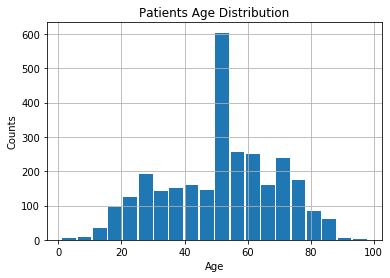

In [152]:
#visualizing age dirstibution

df['age'].plot.hist(grid=True, bins=20, rwidth=0.9)
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(alpha= 1)

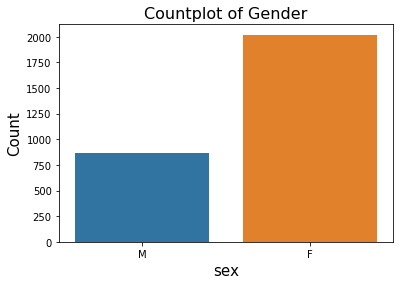

In [156]:

#visualizing the distribution of gender in the dataset
sns.countplot('sex',data = df)
plt.xlabel("sex",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Countplot of Gender",fontsize=16,color="black")
plt.show()

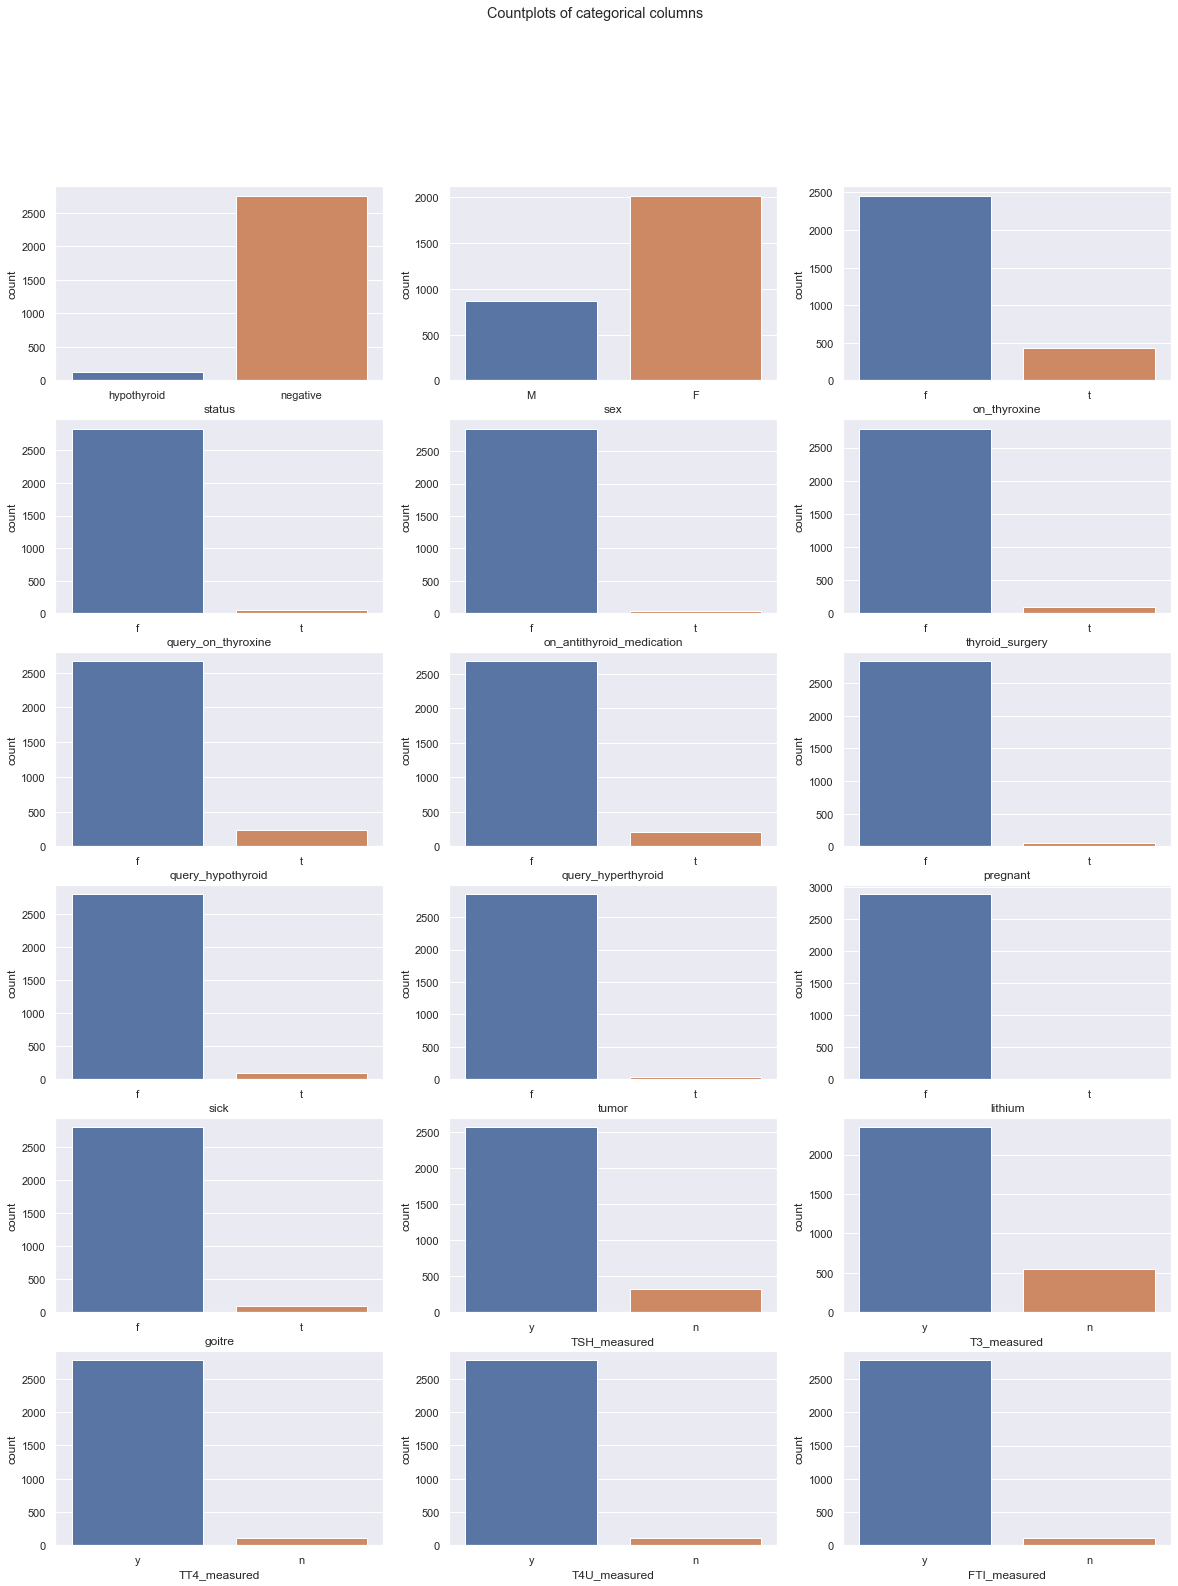

In [165]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns')
for ax, data, column in zip(axes.flatten(), df, categorical):
   sns.countplot(df[column], ax=ax)

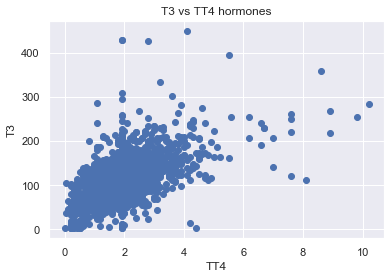

In [175]:
# Plot scatter plot for T3 and T4 hormones
plt.scatter(df["T3"],df["TT4"])
plt.ylabel("T3")
plt.xlabel("TT4")
plt.title("T3 vs TT4 hormones")
plt.show()

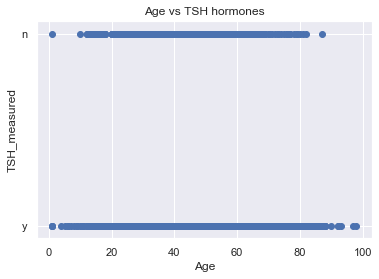

In [177]:
# Plot scatter plot for T3 and T4 hormones
plt.scatter(df["age"],df["TSH_measured"])
plt.ylabel("TSH_measured")
plt.xlabel("Age")
plt.title("Age vs TSH hormones")
plt.show()

# Multivariate Analysis

In [166]:

# Let's display the correlations between the variables
corr = df.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.008035,-0.269111,-0.082874,-0.186727,0.020855
TSH,-0.008035,1.000000,-0.167690,-0.308682,0.076130,-0.235764
T3,-0.269111,-0.167690,1.000000,0.521204,0.384909,0.268378
TT4,-0.082874,-0.308682,0.521204,1.000000,0.317847,0.669362
T4U,-0.186727,0.076130,0.384909,0.317847,1.000000,-0.306287
FTI,0.020855,-0.235764,0.268378,0.669362,-0.306287,1.000000


In [171]:
#Change our target values(y) to a binary

y =df['status']= np.where(df['status']=='hypothyroid',0,1)
print(y)
df['status'].value_counts()


[0 0 0 ... 1 1 1]


1    2758
0     131
Name: status, dtype: int64



*   1 means it's negative
*   0 means it's hypothyroid



In [174]:
X = df.drop(['status'], axis=1)
y= df['status']

# Data Preprocessing

In [186]:
from sklearn.model_selection import train_test_split

#Split our dataset train dataset size is 80% test datset is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [196]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=777023767003ac410365ec53441342b60756d7d62260ca072be18971d0a3091d
  Stored in directory: C:\Users\user1\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [197]:
!pip install category_encoders

In [203]:

# encode categorical variables with one-hot encoding to numeric
#Import category encoders
import category_encoders as ce

encoder = ce.OneHotEncoder(categorical)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)



In [204]:
print(X_train.head(4))

       age  sex_1  sex_2  on_thyroxine_1  on_thyroxine_2  \
1532  55.0      1      0               1               0   
2171  58.0      0      1               1               0   
1139  27.0      0      1               1               0   
976   75.0      0      1               1               0   

      query_on_thyroxine_1  query_on_thyroxine_2  on_antithyroid_medication_1  \
1532                     1                     0                            1   
2171                     1                     0                            1   
1139                     1                     0                            1   
976                      1                     0                            1   

      on_antithyroid_medication_2  thyroid_surgery_1  ...  TT4_measured_2  \
1532                            0                  1  ...               0   
2171                            0                  1  ...               0   
1139                            0                  1  ...     

In [205]:
#Confirm there is no nan in train dataset.
np.any(np.isnan(X_train))

False

In [206]:
# Confirm there is no nan in  test dataset
np.any(np.isnan(X_test))

False

# Feature Scaling

In [207]:
#Use robust scaler to normalize our dataset
cols = X_train.columns


scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

# Decision Trees

In [238]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 98.96193771626297


# Random Forest

In [239]:

# Intiate the randomforestclassifier 
rf = RandomForestClassifier(random_state=0)

# fit the model
rf.fit(X_train, y_train)

# Predict the Test set results
y_pred = rf.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score with 10 decision-trees : 98.4429


In [233]:
#Check the error rate of the model.

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.12478354962115544


In [211]:
#Compute the confusion matrix to understand the actual versus predicted variables.
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
confusion


array([[ 17,   7],
       [  2, 552]], dtype=int64)

In [234]:
#Challenging the model: Random forest classifier using 100 decision trees
# Run the classifier with n_estimators = 100

rf1 = RandomForestClassifier(n_estimators=100, random_state=101,max_depth=5, min_samples_split = 20)

# fit the model to the training set
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [235]:
# Predict on the test set results
y_pred1 = rf1.predict(X_test)


In [218]:
# Create a comparison frame between the actual and predicted target variable
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

,Actual,Predicted
count,578.000000,578.000000
mean,0.958478,0.967128
std,0.199668,0.178456
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [217]:
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred1)*100))

Model accuracy score with 100 decision-trees : 98.2699


In [219]:
#Check the error rate using root mean squared error

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 0.12478354962115544


In [220]:
# Calculate a confusion matrix to identify what patients were predicted to be negative or have hypothyroid
confusion = confusion_matrix(y_test,y_pred1)
confusion

array([[ 15,   9],
       [  1, 553]], dtype=int64)

# Gradient Boosting Classifier

In [221]:
#Intiate the gradient boosting classifier
gradient = GradientBoostingClassifier(learning_rate =0.1,n_estimators=100,max_depth=3,min_samples_split=2) # defining my classifier as  gradient

#fit the train dataset in the classifier
gradient.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [222]:
#Making a prediction
y_pred_g = gradient.predict(X_test)
y_pred_g

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [225]:
#Check the accuracy score of the gradient model
print("gradient_Accuracy score is :",metrics.accuracy_score(y_test, y_pred_g)*100)

gradient_Accuracy score is : 99.13494809688581


In [224]:
# Calculate a confusion matrix to identify what patients were predicted to be negative or have hypothyroid
confusion = confusion_matrix(y_test,y_pred_g)
confusion

array([[ 22,   2],
       [  3, 551]], dtype=int64)

In [242]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=101)

ada_boost = ada_boost.fit(X_train, y_train)
ada_pred = ada_boost.predict(X_test)

# checking the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, ada_pred)*100)

Accuracy: 98.09688581314879


# SVM(Support Vector Machine)


In [226]:

svm  = SVC(kernel = 'linear',C=1.0,gamma='auto',random_state=101)

#SVM after parameter tuning. RBf is used to increase the dimension
svm_rbf = SVC(kernel = 'rbf',C=1.0,gamma='auto',random_state=0)

#SVM after parameter tuning. Sigmoid is used to increase the dimension
clf = SVC(kernel = 'sigmoid',C=1.0,gamma='auto',random_state=0)


In [227]:
#  fitting the train into the model

#For linear
svm.fit(X_train,y_train)

#For rbf
svm_rbf.fit(X_train,y_train)

#For sigmoid
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [228]:
# Now that we have trained our model, let's test how well it can predict if a patient is negattive or positive for hypothyroid

#Making predictions for linear
y_pred_svc = svm.predict(X_test)

#Making predictions for rbf
y_pred_rbf = svm_rbf.predict(X_test)

#Making predictions with parameter tuning
y_pred1 = clf.predict(X_test)

In [230]:
#Check accuracy of model before setting any parameters
print("Accuracy with linear kernel:",metrics.accuracy_score(y_test, y_pred_svc)*100)

#Accuracy score using rbf function
print("Accuracy with rbf kernel : ", accuracy_score(y_test,y_pred_rbf)*100)

#Accuracy score using sigmoid function
print("Accuracy with sigmoid kernel : ", accuracy_score(y_test,y_pred)*100)

Accuracy with linear kernel: 98.78892733564014
Accuracy with rbf kernel :  98.6159169550173
Accuracy with sigmoid kernel :  98.44290657439446


# Further questions


# Challenges


In [ ]:
*   Despite using different classification models, differences between the model accuracy was very minimal.
